In [1]:
import pickle

Now upload files manually via sidebar

# bf 80n incorr i+3

## load

In [2]:
with open("/content/digits_adjList.pkl", "rb") as f:
  digits_adjList = pickle.load(f)

In [3]:
with open("/content/decr_adjList.pkl", "rb") as f:
  decr_adjList = pickle.load(f)

## rmv a few nodes

In [4]:
topperc='3_3'

In [5]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2=None, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()
    # dot.attr(rankdir='LR', ranksep='0.5', nodesep='0.25')  # Adjust the rankdir, ranksep, and nodesep
    dot.attr(ranksep='0.45', nodesep='0.12')  # Adjust the rankdir, ranksep, and nodesep (defaults 0.75, 0.25)

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set2 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    impt_nodes = [(1,5), (4,4), (7,11), (9,1)]

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        node_name = f"{end_node[0]} , {end_node[1]}" # Change to x.y format

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(node_name, color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(node_name, color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            if end_node in impt_nodes:
                dot.node(node_name, color="black", fillcolor="#DADAE4", style='filled', penwidth='2')
            else:
                dot.node(node_name, color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    adjList_1_edges = []
    adjList_2_edges = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            # dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            adjList_1_edges.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in adjList_1_edges:
                start_name = f"{start_node[0]} , {start_node[1]}"
                end_name = f"{end_node[0]} , {end_node[1]}"
                dot.edge(str(start_name), str(end_name), color = 'blue') #light blue #ADD8E6
            adjList_2_edges.append((start_node, end_node))
            # else:
    for (start_node, end_node) in adjList_1_edges:
        start_name = f"{start_node[0]} , {start_node[1]}"
        end_name = f"{end_node[0]} , {end_node[1]}"
        if (start_node, end_node) in adjList_2_edges:
            dot.edge(str(start_name), str(end_name), color = 'purple', penwidth='4.0')
        else:
            dot.edge(str(start_name), str(end_name), color = 'red') #light red #ffcccb
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # dot.attr(splines='ortho')

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    dot.format = 'pdf'  # You can change this to 'pdf', 'png', etc. based on your needs
    # dot.format = 'png'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    files.download(filename + ".pdf")
    # files.download(filename + ".png")

In [8]:
digits_adjList_copy = digits_adjList.copy()
del digits_adjList_copy[(3, 7)]
del digits_adjList_copy[(2, 11)]
del digits_adjList_copy[(2, 8)]
del digits_adjList_copy[(3, 9)]
del digits_adjList_copy[(2, 1)]
del digits_adjList_copy[(3, 5)]
del digits_adjList_copy[(3, 11)]
del digits_adjList_copy[(1, 1)]
del digits_adjList_copy[(2, 9)]

decr_adjList_copy = decr_adjList.copy()
del decr_adjList_copy[(3, 1)]
del decr_adjList_copy[(2, 8)]
del decr_adjList_copy[(9, 7)]
del decr_adjList_copy[(2, 4)]
del decr_adjList_copy[(9, 3)]
del decr_adjList_copy[(7, 8)]

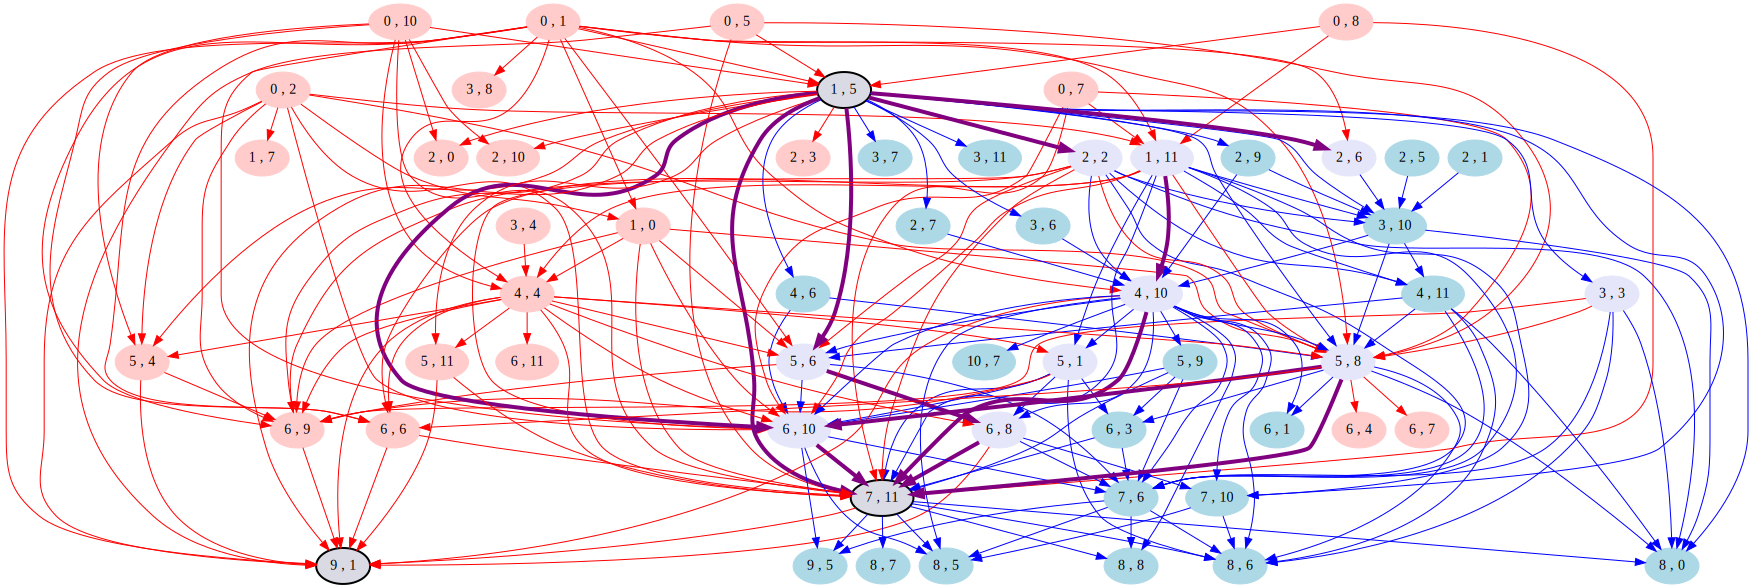

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
plot_graph_adjacency(digits_adjList_copy, decr_adjList_copy, None, filename="circuit_graph_top"+str(topperc))